# **Title: GAN Assignment1 -> Create a simple GAN in PyTorch to generate synthetic sine wave data. Plot the results using MatPlotLib.**

## **Theory:**

GAN(Generative Adversarial Network) represents a cutting-edge approach to generative modeling within deep learning, often leveraging architectures like convolutional neural networks. The goal of generative modeling is to autonomously identify patterns in input data, enabling the model to produce new examples that feasibly resemble the original dataset.

Generative Adversarial Networks (GANs) are a powerful class of neural networks that are used for an unsupervised learning. GANs are made up of two neural networks, a discriminator and a generator. They use adversarial training to produce artificial data that is identical to actual data.

1. The Generator attempts to fool the Discriminator, which is tasked with accurately distinguishing between produced and genuine data, by producing random noise samples.
2. Realistic, high-quality samples are produced as a result of this competitive interaction, which drives both networks toward advancement.
3. GANs are proving to be highly versatile artificial intelligence tools, as evidenced by their extensive use in image synthesis, style transfer, and text-to-image synthesis.
4. They have also revolutionized generative modeling.

Through adversarial training, these models engage in a competitive interplay until the generator becomes adept at creating realistic samples, fooling the discriminator approximately half the time.

Generative Adversarial Networks (GANs) can be broken down into three parts:

1. Generative: To learn a generative model, which describes how data is generated in terms of a probabilistic model.
2. Adversarial: The word adversarial refers to setting one thing up against another. This means that, in the context of GANs, the generative result is compared with the actual images in the data set. A mechanism known as a discriminator is used to apply a model that attempts to distinguish between real and fake images.
3. Networks: Use deep neural networks as artificial intelligence (AI) algorithms for training purposes.


## **Code**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [3]:
# Hyperparameters
latent_dim = 10  # Dimension of the noise vector
hidden_dim = 64  # Number of hidden units in the network
num_epochs = 50  # Number of training epochs
batch_size = 32  # Batch size
lr = 0.001  # Learning rate

In [4]:
# Generate real sine wave data
def generate_sine_wave_data(num_samples=1000):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = np.sin(x)
    return x, y

x_real, y_real = generate_sine_wave_data()

In [5]:
def sample_real_data(batch_size):
    # First, we randomly pick `batch_size` number of indices from the real data.
    indices = np.random.randint(0, len(x_real), batch_size)

    # Then, we fetch the corresponding data samples and labels using those indices.
    # x_real[indices] gives us the batch of input features, and y_real[indices] gives the matching labels.
    # After that, we convert both the inputs and labels into PyTorch tensors of type float32.
    # We also use `.unsqueeze(1)` to add an extra dimension, making the shape suitable for our model.

    return torch.tensor(x_real[indices], dtype=torch.float32).unsqueeze(1), \
           torch.tensor(y_real[indices], dtype=torch.float32).unsqueeze(1)

In [6]:
# Define the Generator class
class Generator(nn.Module):
    def __init__(self):
        # Initialize the Generator class by calling the parent class (nn.Module) constructor
        super(Generator, self).__init__()

        # Define the architecture of the generator network
        self.net = nn.Sequential(
            # The input to the generator is a random vector (latent_dim), which is mapped to a hidden space of size hidden_dim
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),  # ReLU activation function adds non-linearity
            # The hidden layer is also mapped to another hidden space of size hidden_dim
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),  # Another ReLU activation
            # The output layer generates a single value (1) representing the generated data point
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, z):
        # Defines the forward pass: takes random noise vector `z` as input and generates a sample
        return self.net(z)

In [7]:
# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        # Initialize the Discriminator class by calling the parent class (nn.Module) constructor
        super(Discriminator, self).__init__()

        # Define the architecture of the discriminator network
        self.net = nn.Sequential(
            # The input to the discriminator is a data point (size 1), mapped to a hidden space of size hidden_dim
            nn.Linear(1, hidden_dim),
            nn.ReLU(),  # ReLU activation adds non-linearity
            # The hidden layer is again mapped to another hidden space of size hidden_dim
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),  # ReLU activation again
            # The output layer generates a single value (1), indicating the probability that the input is real (Sigmoid used)
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),  # Sigmoid function outputs a value between 0 and 1 (real or fake probability)
        )

    def forward(self, x):
        # Defines the forward pass: takes a data point `x` and classifies it as real or fake
        return self.net(x)


In [8]:
# Initialize the networks
generator = Generator()
discriminator = Discriminator()

In [9]:
# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [10]:
# Loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

In [14]:
# Training loop
for epoch in range(num_epochs):
    # 1. Train the Discriminator
    discriminator.zero_grad()

    # Real data
    real_x, real_y = sample_real_data(batch_size)
    real_pred = discriminator(real_y)
    real_labels = torch.ones((batch_size, 1))  # Labels for real data
    d_loss_real = criterion(real_pred, real_labels)

    # Fake data
    z = torch.randn((batch_size, latent_dim))  # Random noise vector
    fake_y = generator(z).detach()
    fake_pred = discriminator(fake_y)
    fake_labels = torch.zeros((batch_size, 1))  # Labels for fake data
    d_loss_fake = criterion(fake_pred, fake_labels)

    # Total Discriminator loss
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()

    # 2. Train the Generator
    generator.zero_grad()

    # Generate fake data and predict with Discriminator
    z = torch.randn((batch_size, latent_dim))
    fake_y = generator(z)
    fake_pred = discriminator(fake_y)
    g_loss = criterion(fake_pred, torch.ones((batch_size, 1)))  # Want fake data to be classified as real

    g_loss.backward()
    g_optimizer.step()

    # Print losses occasionally
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch [5/50] | D Loss: 1.3507 | G Loss: 0.7899
Epoch [10/50] | D Loss: 1.3324 | G Loss: 0.7783
Epoch [15/50] | D Loss: 1.3047 | G Loss: 0.7562
Epoch [20/50] | D Loss: 1.3949 | G Loss: 0.7351
Epoch [25/50] | D Loss: 1.4402 | G Loss: 0.6875
Epoch [30/50] | D Loss: 1.4181 | G Loss: 0.6611
Epoch [35/50] | D Loss: 1.4334 | G Loss: 0.6647
Epoch [40/50] | D Loss: 1.5031 | G Loss: 0.6798
Epoch [45/50] | D Loss: 1.5568 | G Loss: 0.7467
Epoch [50/50] | D Loss: 1.3465 | G Loss: 0.9509


In [15]:
# Generate synthetic sine wave data using the trained Generator
z = torch.randn((1000, latent_dim))
synthetic_y = generator(z).detach().numpy()
synthetic_x = np.linspace(0, 2 * np.pi, 1000)

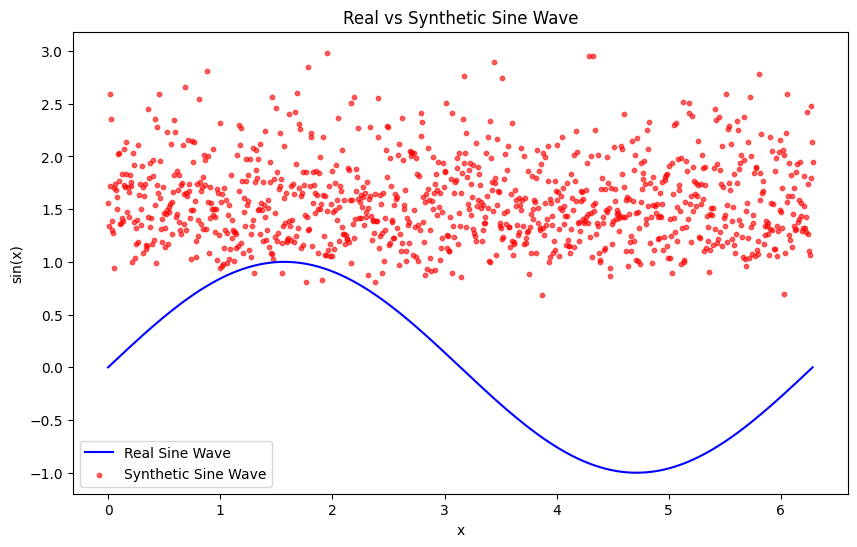

In [16]:
# Plot the real and synthetic sine wave data
plt.figure(figsize=(10, 6))
plt.plot(x_real, y_real, label="Real Sine Wave", color="blue")
plt.scatter(synthetic_x, synthetic_y, label="Synthetic Sine Wave", color="red", s=10, alpha=0.6)
plt.title("Real vs Synthetic Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

the above plot is very vague-> showing that the generator is not performing well and is generating a non sin wave.

So, let's try by changing the parameters for the same code i.e for the same architechture.

In [10]:
# Hyperparameters
latent_dim = 10  # Dimension of the noise vector
hidden_dim = 64  # Number of hidden units in the network
num_epochs = 5000  # Number of training epochs
batch_size = 32  # Batch size
lr = 0.001  # Learning rate

In [18]:
# Generate real sine wave data
def generate_sine_wave_data(num_samples=1000):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = np.sin(x)
    return x, y

x_real, y_real = generate_sine_wave_data()

In [19]:
def sample_real_data(batch_size):
    # First, we randomly pick `batch_size` number of indices from the real data.
    indices = np.random.randint(0, len(x_real), batch_size)

    # Then, we fetch the corresponding data samples and labels using those indices.
    # x_real[indices] gives us the batch of input features, and y_real[indices] gives the matching labels.
    # After that, we convert both the inputs and labels into PyTorch tensors of type float32.
    # We also use `.unsqueeze(1)` to add an extra dimension, making the shape suitable for our model.

    return torch.tensor(x_real[indices], dtype=torch.float32).unsqueeze(1), \
           torch.tensor(y_real[indices], dtype=torch.float32).unsqueeze(1)

In [20]:
# Define the Generator class
class Generator(nn.Module):
    def __init__(self):
        # Initialize the Generator class by calling the parent class (nn.Module) constructor
        super(Generator, self).__init__()

        # Define the architecture of the generator network
        self.net = nn.Sequential(
            # The input to the generator is a random vector (latent_dim), which is mapped to a hidden space of size hidden_dim
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),  # ReLU activation function adds non-linearity
            # The hidden layer is also mapped to another hidden space of size hidden_dim
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),  # Another ReLU activation
            # The output layer generates a single value (1) representing the generated data point
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, z):
        # Defines the forward pass: takes random noise vector `z` as input and generates a sample
        return self.net(z)

# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        # Initialize the Discriminator class by calling the parent class (nn.Module) constructor
        super(Discriminator, self).__init__()

        # Define the architecture of the discriminator network
        self.net = nn.Sequential(
            # The input to the discriminator is a data point (size 1), mapped to a hidden space of size hidden_dim
            nn.Linear(1, hidden_dim),
            nn.ReLU(),  # ReLU activation adds non-linearity
            # The hidden layer is again mapped to another hidden space of size hidden_dim
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),  # ReLU activation again
            # The output layer generates a single value (1), indicating the probability that the input is real (Sigmoid used)
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),  # Sigmoid function outputs a value between 0 and 1 (real or fake probability)
        )

    def forward(self, x):
        # Defines the forward pass: takes a data point `x` and classifies it as real or fake
        return self.net(x)


In [21]:
# Initialize the networks
generator = Generator()
discriminator = Discriminator()

In [22]:
# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [23]:
# Loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

In [24]:
# Training loop
for epoch in range(num_epochs):
    # 1. Train the Discriminator
    discriminator.zero_grad()

    # Real data
    real_x, real_y = sample_real_data(batch_size)
    real_pred = discriminator(real_y)
    real_labels = torch.ones((batch_size, 1))  # Labels for real data
    d_loss_real = criterion(real_pred, real_labels)

    # Fake data
    z = torch.randn((batch_size, latent_dim))  # Random noise vector
    fake_y = generator(z).detach()
    fake_pred = discriminator(fake_y)
    fake_labels = torch.zeros((batch_size, 1))  # Labels for fake data
    d_loss_fake = criterion(fake_pred, fake_labels)

    # Total Discriminator loss
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()

    # 2. Train the Generator
    generator.zero_grad()

    # Generate fake data and predict with Discriminator
    z = torch.randn((batch_size, latent_dim))
    fake_y = generator(z)
    fake_pred = discriminator(fake_y)
    g_loss = criterion(fake_pred, torch.ones((batch_size, 1)))  # Want fake data to be classified as real

    g_loss.backward()
    g_optimizer.step()

    # Print losses occasionally
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [500/5000] | D Loss: 0.4936 | G Loss: 1.7830
Epoch [1000/5000] | D Loss: 0.9423 | G Loss: 1.0398
Epoch [1500/5000] | D Loss: 1.3913 | G Loss: 0.7182
Epoch [2000/5000] | D Loss: 1.3773 | G Loss: 0.6981
Epoch [2500/5000] | D Loss: 1.4048 | G Loss: 0.6964
Epoch [3000/5000] | D Loss: 1.3881 | G Loss: 0.6940
Epoch [3500/5000] | D Loss: 1.3911 | G Loss: 0.6539
Epoch [4000/5000] | D Loss: 1.3721 | G Loss: 0.7257
Epoch [4500/5000] | D Loss: 1.3853 | G Loss: 0.6603
Epoch [5000/5000] | D Loss: 1.3932 | G Loss: 0.7298


In [25]:
# Generate synthetic sine wave data using the trained Generator
z = torch.randn((1000, latent_dim))
synthetic_y = generator(z).detach().numpy()
synthetic_x = np.linspace(0, 2 * np.pi, 1000)

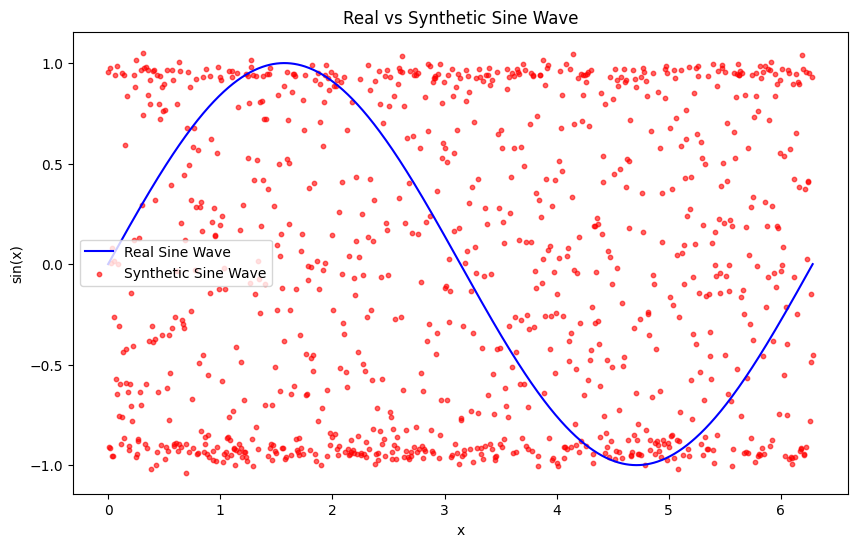

In [26]:
# Plot the real and synthetic sine wave data
plt.figure(figsize=(10, 6))
plt.plot(x_real, y_real, label="Real Sine Wave", color="blue")
plt.scatter(synthetic_x, synthetic_y, label="Synthetic Sine Wave", color="red", s=10, alpha=0.6)
plt.title("Real vs Synthetic Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()


Unlike the previous one, the points are not generated over the entire range as that of the sin wave but the distribution or the structure is not like the sin wave. so, lets try changing and playing around the architechture as in the above case we have executed for 5000 epochs which in itself is very high and we shall not only increase the epoch now but change the architechture also.

In [2]:
# Define the Generator class (responsible for creating fake data)
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        # Initialize the parent class (nn.Module)
        super(Generator, self).__init__()

        # The generator's job is to take some random noise as input (input_dim)
        # and transform it into a fake data point that looks real (output_dim).
        self.model = nn.Sequential(
            # First layer: Takes the random noise (input_dim) and maps it to 16 features.
            nn.Linear(input_dim, 16),
            nn.ReLU(),  # Adds some non-linearity to help the generator learn complex patterns.

            # Second layer: Expands those 16 features into 32 features for more complexity.
            nn.Linear(16, 32),
            nn.ReLU(),  # Again, a non-linear activation to help the model learn better.

            # Final layer: Maps the 32 features down to the size of the desired output (output_dim).
            nn.Linear(32, output_dim)
        )

    def forward(self, z):
        # Defines the forward pass for the generator.
        # Takes in the random noise `z` and passes it through the layers to generate fake data.
        return self.model(z)

# Define the Discriminator class (responsible for distinguishing real vs. fake data)
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        # Initialize the parent class (nn.Module)
        super(Discriminator, self).__init__()

        # The discriminator's job is to take a data point (real or fake, input_dim),
        # and predict whether it’s real (1) or fake (0).
        self.model = nn.Sequential(
            # First layer: Takes the input data (input_dim) and maps it to 32 features.
            nn.Linear(input_dim, 32),
            nn.ReLU(),  # Adds non-linearity to learn more complex features.

            # Second layer: Reduces the 32 features to 16, refining the information.
            nn.Linear(32, 16),
            nn.ReLU(),  # Another non-linear activation to keep things flexible.

            # Final layer: Maps the 16 features down to a single value (the probability of real or fake).
            nn.Linear(16, 1),
            nn.Sigmoid()  # Squashes the output between 0 and 1 to represent a probability.
        )

    def forward(self, x):
        # Defines the forward pass for the discriminator.
        # Takes in a data point `x` and outputs a probability (real or fake).
        return self.model(x)

In [3]:
# Function to generate real sine wave data
def generate_sine_wave_data(num_samples):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = np.sin(x)
    return x, y

In [4]:
# Hyperparameters
z_dim = 10         # Noise vector size for the generator
data_dim = 100     # Dimension of sine wave samples
batch_size = 64
lr = 0.001         # Learning rate
num_epochs = 1000  # Training epochs

In [5]:
# Initialize Generator and Discriminator
generator = Generator(input_dim=z_dim, output_dim=data_dim)
discriminator = Discriminator(input_dim=data_dim)

In [6]:
# Optimizers
gen_optimizer = optim.Adam(generator.parameters(), lr=lr)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [7]:
# Loss function
loss_fn = nn.BCELoss()

In [8]:
# Training the GAN
real_labels = torch.ones(batch_size, 1)
fake_labels = torch.zeros(batch_size, 1)
for epoch in range(num_epochs):
    # Generate real sine wave data
    x_real, y_real = generate_sine_wave_data(data_dim)
    x_real_tensor = torch.tensor([y_real] * batch_size, dtype=torch.float32)

    # Train the Discriminator
    z = torch.randn(batch_size, z_dim)
    fake_data = generator(z).detach()
    real_pred = discriminator(x_real_tensor)
    fake_pred = discriminator(fake_data)

    disc_loss = loss_fn(real_pred, real_labels) + loss_fn(fake_pred, fake_labels)
    disc_optimizer.zero_grad()
    disc_loss.backward()
    disc_optimizer.step()

    # Train the Generator
    z = torch.randn(batch_size, z_dim)
    fake_data = generator(z)
    fake_pred = discriminator(fake_data)

    gen_loss = loss_fn(fake_pred, real_labels)
    gen_optimizer.zero_grad()
    gen_loss.backward()
    gen_optimizer.step()

    # Print losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Disc Loss: {disc_loss.item()}, Gen Loss: {gen_loss.item()}")

<ipython-input-8-7bd262044dc9>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  x_real_tensor = torch.tensor([y_real] * batch_size, dtype=torch.float32)


Epoch 0/1000, Disc Loss: 1.407263994216919, Gen Loss: 0.8418064117431641
Epoch 100/1000, Disc Loss: 0.7976317405700684, Gen Loss: 1.0922369956970215
Epoch 200/1000, Disc Loss: 0.4627179205417633, Gen Loss: 1.8938500881195068
Epoch 300/1000, Disc Loss: 0.457966148853302, Gen Loss: 2.464108467102051
Epoch 400/1000, Disc Loss: 0.626301646232605, Gen Loss: 1.5868239402770996
Epoch 500/1000, Disc Loss: 0.4637463092803955, Gen Loss: 1.9902257919311523
Epoch 600/1000, Disc Loss: 0.4155068099498749, Gen Loss: 1.809203863143921
Epoch 700/1000, Disc Loss: 2.2798776626586914, Gen Loss: 1.027190923690796
Epoch 800/1000, Disc Loss: 1.830747127532959, Gen Loss: 0.9097351431846619
Epoch 900/1000, Disc Loss: 0.9703922271728516, Gen Loss: 0.8739888668060303


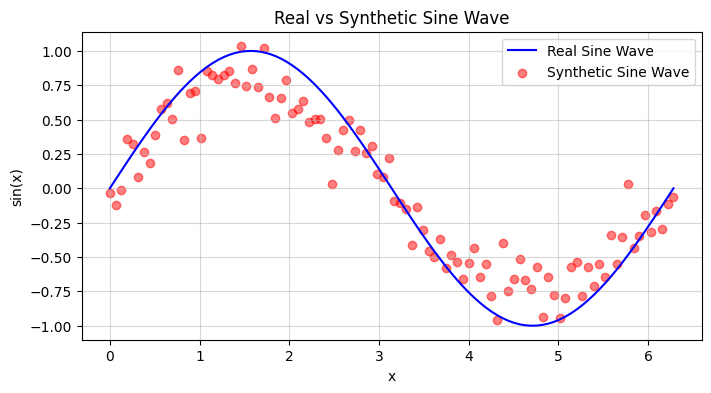

In [9]:
# Generate and plot the synthetic sine wave
z = torch.randn(1, z_dim)
generated_sine_wave = generator(z).detach().numpy().flatten()

plt.figure(figsize=(8, 4))
x_real, y_real = generate_sine_wave_data(data_dim)
plt.plot(x_real, y_real, label="Real Sine Wave", color="blue")
plt.scatter(x_real, generated_sine_wave, color="red", label="Synthetic Sine Wave", alpha=0.5)
plt.title("Real vs Synthetic Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


## **Observations and Conclusions:**

the above plot represents the situation wherein the synthetic sin wave is very much overlapping or is in similar structure as that of the original sin wave.

we can see that this code is performing better than the previous one, even when the first one had a complex architechture. this might be because of the following reasons:

1. generates the sine wave data once and reuses it, avoiding redundant data sampling in each batch.
2. has smaller, simpler networks, leading to easier training and faster convergence.
3.  the generator’s output is detached correctly before updating the discriminator, ensuring proper gradient flow.


References:

1. https://www.geeksforgeeks.org/generative-adversarial-network-gan/
2. https://datahacker.rs/006-gans-how-to-develop-a-1d-gan-from-scratch/
3. https://medium.com/@mhmf/how-gans-generate-new-data-a-step-by-step-guide-with-sine-waves-1c6aa4049357